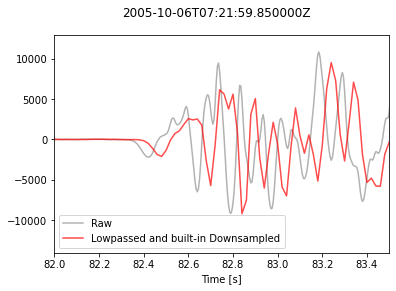

In [9]:
import numpy as np
import matplotlib.pyplot as plt

import obspy

# Read the seismogram
st = obspy.read("https://examples.obspy.org/RJOB_061005_072159.ehz.new")

# There is only one trace in the Stream object, let's work on that trace...
tr = st[0]

# For comparison also only filter the original data (same filter options as in
# automatically applied filtering during downsampling, corner frequency
# 0.4 * new sampling rate)
tr_filt = tr.copy()
tr_filt.filter('lowpass', freq=0.4 * tr.stats.sampling_rate / 4.0,zerophase=True)
tr_filt.decimate(factor=4, strict_length=False,no_filter=True)

# Decimate the 200 Hz data by a factor of 4 to 50 Hz. Note that this
# automatically includes a lowpass filtering with corner frequency 20 Hz.
# We work on a copy of the original data just to demonstrate the effects of
# downsampling.
tr_new = tr.copy()
tr_new.decimate(factor=4, strict_length=False)

# Now let's plot the raw and filtered data...
t = np.arange(0, tr.stats.npts / tr.stats.sampling_rate, tr.stats.delta)
t_new = np.arange(0, tr_new.stats.npts / tr_new.stats.sampling_rate,tr_new.stats.delta)

plt.plot(t, tr.data, 'k', label='Raw', alpha=0.3)
#plt.plot(t_new, tr_filt.data, 'b', label='Lowpassed then Downsampled', alpha=0.7)
plt.plot(t_new, tr_new.data, 'r', label='Lowpassed and built-in Downsampled', alpha=0.7)
plt.xlabel('Time [s]')
plt.xlim(82, 83.5)
plt.suptitle(tr.stats.starttime)
plt.legend()
plt.show()

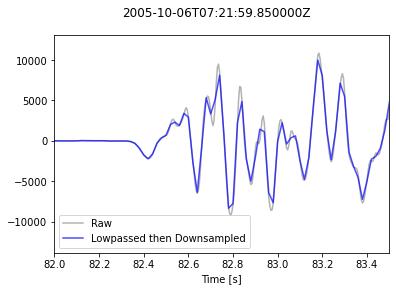

In [10]:
plt.plot(t, tr.data, 'k', label='Raw', alpha=0.3)
plt.plot(t_new, tr_filt.data, 'b', label='Lowpassed then Downsampled', alpha=0.7)
#plt.plot(t_new, tr_new.data, 'r', label='Lowpassed and built-in Downsampled', alpha=0.7)
plt.xlabel('Time [s]')
plt.xlim(82, 83.5)
plt.suptitle(tr.stats.starttime)
plt.legend()
plt.show()

In [ ]:
'''
# do automatic lowpass filtering
    if not no_filter:
        # be sure filter still behaves good
    if factor > 16:
        msg = "Automatic filter design is unstable for decimation " + \
                      "factors above 16. Manual decimation is necessary."
        raise ArithmeticError(msg)
    freq = self.stats.sampling_rate * 0.5 / float(factor)
    self.filter('lowpass_cheby_2', freq=freq, maxorder=12)   # no zerophase
'''